In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/processed/evtx_features.csv')
df.head()

,time,host,total_events,event_1,event_3,event_8,event_10,event_11,event_12,event_4624,...,event_4658,event_4661,event_4663,event_4672,event_4698,event_4768,event_5140,event_5145,event_5156,event_5158
0,576,MSEDGEWIN10,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,578,MSEDGEWIN10,4,2,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,583,MSEDGEWIN10,5,3,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,676,MSEDGEWIN10,6,4,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,680,MSEDGEWIN10,7,4,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
columns = list(df.columns)

In [4]:
features = columns[3:]
features

['event_1',
 'event_3',
 'event_8',
 'event_10',
 'event_11',
 'event_12',
 'event_4624',
 'event_4625',
 'event_4648',
 'event_4658',
 'event_4661',
 'event_4663',
 'event_4672',
 'event_4698',
 'event_4768',
 'event_5140',
 'event_5145',
 'event_5156',
 'event_5158']

In [5]:
df[features] = df[features].div(df.total_events, axis = 0)

In [6]:
df

,time,host,total_events,event_1,event_3,event_8,event_10,event_11,event_12,event_4624,...,event_4658,event_4661,event_4663,event_4672,event_4698,event_4768,event_5140,event_5145,event_5156,event_5158
0,576,MSEDGEWIN10,2,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,578,MSEDGEWIN10,4,0.500000,0.500000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,583,MSEDGEWIN10,5,0.600000,0.400000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,676,MSEDGEWIN10,6,0.666667,0.333333,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,680,MSEDGEWIN10,7,0.571429,0.428571,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,58120,DC1.insecurebank.local,3,0.666667,0.000000,0.0,0.0,0.0,0.333333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
749,63120,DC1.insecurebank.local,1,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
750,63773,DC1.insecurebank.local,2,0.500000,0.500000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
751,63783,DC1.insecurebank.local,3,0.333333,0.666667,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Separating out the features
X = df.loc[:, features].values

In [8]:
# Standardizing the features
X = StandardScaler().fit_transform(X)

In [9]:
X

array([[ 1.08697192, -0.5252124 , -0.21123389, ..., -0.2918729 ,
        -0.18295281, -0.14866452],
       [-0.07985456,  1.96764616, -0.21123389, ..., -0.2918729 ,
        -0.18295281, -0.14866452],
       [ 0.15351073,  1.46907444, -0.21123389, ..., -0.2918729 ,
        -0.18295281, -0.14866452],
       ...,
       [-0.07985456,  1.96764616, -0.21123389, ..., -0.2918729 ,
        -0.18295281, -0.14866452],
       [-0.46879673,  2.79859901, -0.21123389, ..., -0.2918729 ,
        -0.18295281, -0.14866452],
       [-0.07985456, -0.5252124 , -0.21123389, ..., -0.2918729 ,
        -0.18295281, -0.14866452]])

In [10]:
pca = PCA(n_components=2)
pcs = pca.fit_transform(X)
pca_df = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2'])

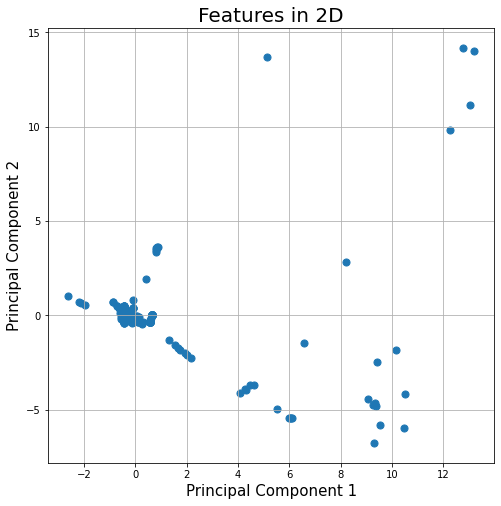

In [11]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Features in 2D', fontsize = 20)
ax.scatter(pca_df['pc1']
               , pca_df['pc2']
               , s = 50)
ax.grid()

In [12]:
outliers_index = list(pca_df[pca_df.pc1>2.4].index)

In [13]:
df.iloc[outliers_index]

,time,host,total_events,event_1,event_3,event_8,event_10,event_11,event_12,event_4624,...,event_4658,event_4661,event_4663,event_4672,event_4698,event_4768,event_5140,event_5145,event_5156,event_5158
134,49027,MSEDGEWIN10,10,0.500000,0.0,0.0,0.0,0.0,0.0,0.300000,...,0.0,0.000000,0.0,0.000000,0.100000,0.0,0.000000,0.000000,0.000000,0.000000
542,39989,PC01.example.corp,2,0.000000,0.0,0.0,0.0,0.0,0.0,0.500000,...,0.0,0.000000,0.0,0.500000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
543,41243,PC01.example.corp,5,0.000000,0.0,0.0,0.0,0.0,0.0,0.200000,...,0.0,0.000000,0.0,0.200000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
585,65041,PC01.example.corp,45,0.311111,0.0,0.0,0.0,0.0,0.0,0.044444,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.266667,0.422222,0.066667
586,65083,PC01.example.corp,49,0.285714,0.0,0.0,0.0,0.0,0.0,0.061224,...,0.0,0.000000,0.0,0.020408,0.000000,0.0,0.000000,0.244898,0.428571,0.061224
587,65085,PC01.example.corp,51,0.274510,0.0,0.0,0.0,0.0,0.0,0.058824,...,0.0,0.000000,0.0,0.019608,0.000000,0.0,0.000000,0.235294,0.450980,0.058824
588,65097,PC01.example.corp,54,0.259259,0.0,0.0,0.0,0.0,0.0,0.074074,...,0.0,0.000000,0.0,0.037037,0.000000,0.0,0.000000,0.222222,0.444444,0.055556
589,65098,PC01.example.corp,65,0.215385,0.0,0.0,0.0,0.0,0.0,0.076923,...,0.0,0.000000,0.0,0.046154,0.000000,0.0,0.000000,0.184615,0.492308,0.046154
590,65118,PC01.example.corp,91,0.153846,0.0,0.0,0.0,0.0,0.0,0.054945,...,0.0,0.000000,0.0,0.032967,0.000000,0.0,0.000000,0.131868,0.571429,0.098901
591,65119,PC01.example.corp,94,0.148936,0.0,0.0,0.0,0.0,0.0,0.053191,...,0.0,0.000000,0.0,0.031915,0.000000,0.0,0.000000,0.127660,0.585106,0.095745


In [14]:
from sklearn.svm import OneClassSVM
from numpy import quantile, where, random
clf_svm = OneClassSVM(kernel='rbf', nu=0.01)
print(clf_svm)

OneClassSVM(nu=0.01)


In [15]:
clf_svm.fit(pcs)

OneClassSVM(nu=0.01)

In [16]:
pred = clf_svm.predict(pcs)

In [17]:
anom_index = where(pred==-1)
values = pcs[anom_index]

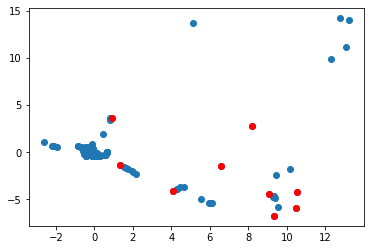

In [18]:
plt.scatter(pcs[:,0], pcs[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()

In [48]:
df.iloc[list(anom_index[0])]

,time,host,total_events,event_1,event_3,event_8,event_10,event_11,event_12,event_4624,...,event_4658,event_4661,event_4663,event_4672,event_4698,event_4768,event_5140,event_5145,event_5156,event_5158
127,47858,MSEDGEWIN10,40,13,0,0,2,24,0,0,...,0,0,0,0,1,0,0,0,0,0
128,47903,MSEDGEWIN10,41,13,0,0,2,24,0,0,...,0,0,0,0,1,0,0,0,0,0
134,49027,MSEDGEWIN10,10,5,0,0,0,0,0,3,...,0,0,0,0,1,0,0,0,0,0
578,64924,PC01.example.corp,28,14,0,0,0,0,0,2,...,0,0,0,0,0,0,0,12,5,0
588,65097,PC01.example.corp,54,14,0,0,0,0,0,4,...,0,0,0,2,0,0,0,12,24,3
590,65118,PC01.example.corp,91,14,0,0,0,0,0,5,...,0,0,0,3,0,0,0,12,52,9
594,65958,PC01.example.corp,113,0,0,0,0,0,0,5,...,0,0,0,3,0,0,0,30,63,9
669,141,WIN-77LTAPHIQ1R.example.corp,25,0,0,0,0,0,0,6,...,0,3,0,5,2,0,4,5,0,0
684,84248,WIN-77LTAPHIQ1R.example.corp,43,0,0,0,0,0,0,3,...,0,7,0,2,0,0,2,3,22,4
686,84255,WIN-77LTAPHIQ1R.example.corp,56,0,0,0,0,0,0,3,...,0,16,0,2,0,0,2,3,26,4


In [19]:
df_test = pd.read_csv('../data/processed/purplesharp_pivoted.csv')
df_test.head()

,time,host,total_events,event_1,event_3,event_10,event_11,event_12,event_4624,event_4625,event_4658,event_4661,event_4663,event_4672,event_5140,event_5145,event_5156,event_5158
0,16186,wec.internal.cloudapp.net,6,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0
1,16187,wec.internal.cloudapp.net,8,0,0,0,0,0,0,0,0,0,0,0,0,0,7,1
2,16189,wec.internal.cloudapp.net,9,0,0,0,1,0,0,0,0,0,0,0,0,0,7,1
3,16192,wec.internal.cloudapp.net,84,1,0,3,1,47,0,0,21,0,1,0,0,0,8,2
4,16193,wec.internal.cloudapp.net,755,3,0,38,7,558,4,7,70,0,10,4,0,0,33,21


In [20]:
df_test['event_8'] = 0
df_test['event_4648'] = 0
df_test['event_4698'] = 0 
df_test['event_4768'] = 0

In [21]:
df_test[features] = df_test[features].div(df_test.total_events, axis = 0)
# Separating out the features
X_test = df_test.loc[:, features].values

In [22]:
# Standardizing the features
X_test = StandardScaler().fit_transform(X_test)

In [23]:
pca_test = PCA(n_components=2)
pcs_test = pca_test.fit_transform(X_test)

In [24]:
pred_test = clf_svm.predict(pcs_test)

In [25]:
anom_index = where(pred_test==-1)
values = pcs_test[anom_index]

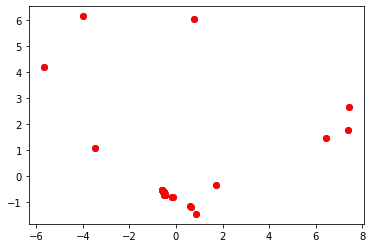

In [26]:
plt.scatter(pcs_test[:,0], pcs_test[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [58]:
df= pd.read_csv('../data/processed/merged_dataset_pivoted.csv')
df.head()

,time,host,total_events,is_malicious,event_1,event_3,event_8,event_10,event_11,event_12,...,event_4658,event_4661,event_4663,event_4672,event_4698,event_4768,event_5140,event_5145,event_5156,event_5158
0,3,Comp581624,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,Comp581624,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,Comp581624,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,Comp581624,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,Comp581624,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
columns = list(df.columns)
features = columns[4:]
df[features] = df[features].div(df.total_events, axis = 0)
# Separating out the features
X = df.loc[:, features].values
y = df.loc[:, ['is_malicious']].values
print(X)
print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [60]:
X = StandardScaler().fit_transform(X)

In [61]:
pca = PCA(n_components=2)
pcs = pca.fit_transform(X)
pca_df = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2'])

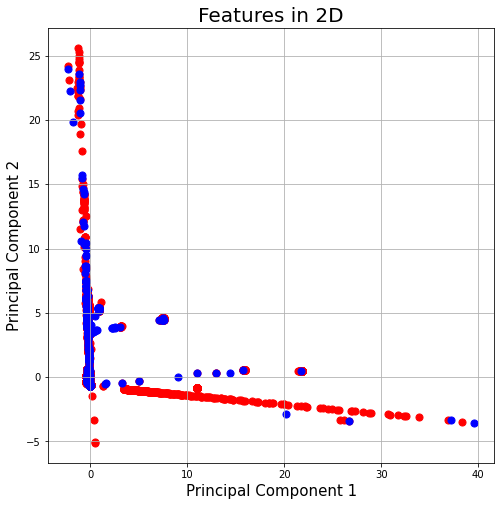

In [68]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Features in 2D', fontsize = 20)

targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df['is_malicious'] == target
    ax.scatter(pca_df.loc[indicesToKeep, 'pc1']
               , pca_df.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
    
# ax.legend(targets)
# ax.scatter(pca_df['pc1']
#                , pca_df['pc2']
#                , s = 50)
ax.grid()

In [63]:

# one-class svm for imbalanced binary classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score
from sklearn.svm import OneClassSVM

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2, stratify=y)
# define outlier detection model
model = OneClassSVM(gamma='scale', nu=0.008)
# fit on majority class
trainX = trainX[np.where(np.any(trainy==1, axis=1))]
model.fit(trainX)
# detect outliers in the test set
yhat = model.predict(testX)
# mark inliers 1, outliers -1
testy[testy == 1] = -1
testy[testy == 0] = 1
# calculate score
score = f1_score(testy, yhat, pos_label=-1)
print('F1 Score: %.3f' % score)

F1 Score: 0.030


In [64]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
print(accuracy_score(testy, yhat))
print(precision_score(testy, yhat, pos_label = -1))
print(recall_score(testy, yhat, pos_label = -1))

0.940096420145656
0.018386108273748723
0.08


In [74]:
from sklearn.tree import DecisionTreeClassifier
# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2, stratify=y)
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, pos_label = 1))
print(recall_score(y_test, y_pred, pos_label = 1))

Accuracy: 0.9899989742537696
0.5742574257425742
0.5155555555555555


In [75]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0, sampling_strategy="minority")
X_os, y_os = smote.fit_resample(X, y)

In [82]:
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_os, y_os, test_size = 0.2, random_state=2)
clf_os = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf_os.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_os = clf_os.predict(X_test_os)
print("Accuracy:",accuracy_score(y_test_os, y_pred_os))
print(precision_score(y_test_os, y_pred_os, pos_label = 0))
print(recall_score(y_test_os, y_pred_os, pos_label = 0))

Accuracy: 0.8026617893139277
0.7187065175043135
0.9986852281515854


In [91]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_os,y_train_os.ravel())

#Predict the response for test dataset
y_pred_os = neigh.predict(X_test_os)

print("Accuracy:",accuracy_score(y_test_os, y_pred_os))
print(precision_score(y_test_os, y_pred_os, pos_label = 0))
print(recall_score(y_test_os, y_pred_os, pos_label = 0))

Accuracy: 0.9863408179943184
0.9836960701376606
0.9892498066511988


In [92]:
print(precision_score(y_test_os, y_pred_os, pos_label = 1))
print(recall_score(y_test_os, y_pred_os, pos_label = 1))

0.9890499448558374
0.9833946894336962


In [95]:
from sklearn.linear_model import LogisticRegression
# instantiate model
model = LogisticRegression()
# fit 
model.fit(X_train_os,y_train_os)
# predict
y_pred_os = model.predict(X_test_os)
print("Accuracy:",accuracy_score(y_test_os, y_pred_os))
print(precision_score(y_test_os, y_pred_os, pos_label = 0))
print(recall_score(y_test_os, y_pred_os, pos_label = 0))
print(precision_score(y_test_os, y_pred_os, pos_label = 1))
print(recall_score(y_test_os, y_pred_os, pos_label = 1))

Accuracy: 0.9002996458730591
0.9038641321283889
0.897293116782676
0.8967420884845657
0.9033445601942508
